In [34]:
pip install tldextract

In [35]:
pip install eli5

In [36]:
# Importing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LassoCV
from collections import Counter
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
import lightgbm as lgb
from sklearn.ensemble import GradientBoostingRegressor
from imblearn.under_sampling import RandomUnderSampler
from keras.layers import Activation, Dense, Flatten 
from typing import *
import random
from sklearn.tree import DecisionTreeRegressor
import sys
import os
!pip install tldextract -q
import tldextract
import seaborn as sns 
import warnings
import regex as re
import eli5
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn import svm
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from urllib.parse import urlparse
from nltk.tokenize import RegexpTokenizer

In [37]:
df = pd.read_csv('/content/phishing_site_urls.csv')
df.head()
url_data = df
url_data

,URL,Label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


# Preprocessing
Including: 
1. Feature Extraction
2. Random OverSampling
3. SMOTE Oversampling
4. Feature Selection

In [ ]:
url_data = url_data.rename(columns={"URL": "url", "Label": "label"})
url_data

,url,label
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,bad
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,bad
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,bad
3,mail.printakid.com/www.online.americanexpress....,bad
4,thewhiskeydregs.com/wp-content/themes/widescre...,bad
...,...,...
549341,23.227.196.215/,bad
549342,apple-checker.org/,bad
549343,apple-iclods.org/,bad
549344,apple-uptoday.org/,bad


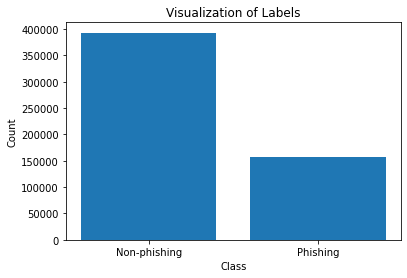

Number of Phishing URLs:  156422
Number of non-phishing URLs:  392924


In [ ]:
# Checking for balance in our data

counts = url_data.value_counts(url_data.label, sort=True)
classes = url_data.label.unique()
plt.bar(['Non-phishing','Phishing'], counts)

plt.title('Visualization of Labels')
plt.ylabel('Count')
plt.xlabel('Class')
plt.show()

print('Number of Phishing URLs: ', len(url_data[url_data['label']== 'bad']))
print('Number of non-phishing URLs: ', len(url_data[url_data['label']== 'good']))

# This means that our classes are imbalanced as expected.

In [ ]:
url_data['label'] = url_data['label'].replace({"good": 0, "bad": 1})

In [ ]:
def parse_url(url: str) -> Optional[Dict[str, str]]:
    try:
        no_scheme = not url.startswith('https://') and not url.startswith('http://')
        if no_scheme:
            parsed_url = urlparse(f"http://{url}")
            return {
                "scheme": None, # not established a value for this
                "netloc": parsed_url.netloc,
                "path": parsed_url.path,
                "params": parsed_url.params,
                "query": parsed_url.query,
                "fragment": parsed_url.fragment,
            }
        else:
            parsed_url = urlparse(url)
            return {
                "scheme": parsed_url.scheme,
                "netloc": parsed_url.netloc,
                "path": parsed_url.path,
                "params": parsed_url.params,
                "query": parsed_url.query,
                "fragment": parsed_url.fragment,
            }
    except:
        return None

In [ ]:
url_data["parsed_url"] = url_data.url.apply(parse_url)
url_data

,url,label,parsed_url
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1,"{'scheme': None, 'netloc': 'nobell.it', 'path'..."
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1,"{'scheme': None, 'netloc': 'www.dghjdgf.com', ..."
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1,"{'scheme': None, 'netloc': 'serviciosbys.com',..."
3,mail.printakid.com/www.online.americanexpress....,1,"{'scheme': None, 'netloc': 'mail.printakid.com..."
4,thewhiskeydregs.com/wp-content/themes/widescre...,1,"{'scheme': None, 'netloc': 'thewhiskeydregs.co..."
...,...,...,...
549341,23.227.196.215/,1,"{'scheme': None, 'netloc': '23.227.196.215', '..."
549342,apple-checker.org/,1,"{'scheme': None, 'netloc': 'apple-checker.org'..."
549343,apple-iclods.org/,1,"{'scheme': None, 'netloc': 'apple-iclods.org',..."
549344,apple-uptoday.org/,1,"{'scheme': None, 'netloc': 'apple-uptoday.org'..."


In [ ]:
url_data = pd.concat([
    url_data.drop(['parsed_url'], axis=1),
    url_data['parsed_url'].apply(pd.Series)
], axis=1)
url_data

,url,label,scheme,netloc,path,params,query,fragment
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1,None,nobell.it,/70ffb52d079109dca5664cce6f317373782/login.Sky...,,cmd=_profile-ach&outdated_page_tmpl=p/gen/fail...,
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1,None,www.dghjdgf.com,/paypal.co.uk/cycgi-bin/webscrcmd=_home-custom...,,,
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1,None,serviciosbys.com,/paypal.cgi.bin.get-into.herf.secure.dispatch3...,,,
3,mail.printakid.com/www.online.americanexpress....,1,None,mail.printakid.com,/www.online.americanexpress.com/index.html,,,
4,thewhiskeydregs.com/wp-content/themes/widescre...,1,None,thewhiskeydregs.com,/wp-content/themes/widescreen/includes/temp/pr...,,84784787824HDJNDJDSJSHD//2724782784/,
...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,1,None,23.227.196.215,/,,,
549342,apple-checker.org/,1,None,apple-checker.org,/,,,
549343,apple-iclods.org/,1,None,apple-iclods.org,/,,,
549344,apple-uptoday.org/,1,None,apple-uptoday.org,/,,,


In [ ]:
url_data = url_data[~url_data.netloc.isnull()]
url_data

,url,label,scheme,netloc,path,params,query,fragment
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1,None,nobell.it,/70ffb52d079109dca5664cce6f317373782/login.Sky...,,cmd=_profile-ach&outdated_page_tmpl=p/gen/fail...,
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1,None,www.dghjdgf.com,/paypal.co.uk/cycgi-bin/webscrcmd=_home-custom...,,,
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1,None,serviciosbys.com,/paypal.cgi.bin.get-into.herf.secure.dispatch3...,,,
3,mail.printakid.com/www.online.americanexpress....,1,None,mail.printakid.com,/www.online.americanexpress.com/index.html,,,
4,thewhiskeydregs.com/wp-content/themes/widescre...,1,None,thewhiskeydregs.com,/wp-content/themes/widescreen/includes/temp/pr...,,84784787824HDJNDJDSJSHD//2724782784/,
...,...,...,...,...,...,...,...,...
549341,23.227.196.215/,1,None,23.227.196.215,/,,,
549342,apple-checker.org/,1,None,apple-checker.org,/,,,
549343,apple-iclods.org/,1,None,apple-iclods.org,/,,,
549344,apple-uptoday.org/,1,None,apple-uptoday.org,/,,,


In [ ]:
url_data["length"] = url_data.url.str.len()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
url_data["tld"] = url_data.netloc.apply(lambda nl: tldextract.extract(nl).suffix)
url_data['tld'] = url_data['tld'].replace('','None')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
url_data["is_ip"] = url_data.netloc.str.fullmatch(r"\d+\.\d+\.\d+\.\d+")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
url_data['domain_hyphens'] = url_data.netloc.str.count('-')
url_data['domain_underscores'] = url_data.netloc.str.count('_')
url_data['path_hyphens'] = url_data.path.str.count('-')
url_data['path_underscores'] = url_data.path.str.count('_')
url_data['slashes'] = url_data.path.str.count('/')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
url_data['full_stops'] = url_data.path.str.count('.')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
def get_num_subdomains(netloc: str) -> int:
    subdomain = tldextract.extract(netloc).subdomain 
    if subdomain == "":
        return 0
    return subdomain.count('.') + 1

url_data['num_subdomains'] = url_data['netloc'].apply(lambda net: get_num_subdomains(net))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
tokenizer = RegexpTokenizer(r'[A-Za-z]+')
def tokenize_domain(netloc: str) -> str:
    split_domain = tldextract.extract(netloc)
    no_tld = str(split_domain.subdomain +'.'+ split_domain.domain)
    return " ".join(map(str,tokenizer.tokenize(no_tld)))
         
url_data['domain_tokens'] = url_data['netloc'].apply(lambda net: tokenize_domain(net))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
url_data['path_tokens'] = url_data['path'].apply(lambda path: " ".join(map(str,tokenizer.tokenize(path))))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
url_data_y = url_data['label']
url_data.drop('label', axis=1, inplace=True)
url_data.drop('url', axis=1, inplace=True)
url_data.drop('scheme', axis=1, inplace=True)
url_data.drop('netloc', axis=1, inplace=True)
url_data.drop('path', axis=1, inplace=True)
url_data.drop('params', axis=1, inplace=True)
url_data.drop('query', axis=1, inplace=True)
url_data.drop('fragment', axis=1, inplace=True)
url_data

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,length,tld,is_ip,domain_hyphens,domain_underscores,path_hyphens,path_underscores,slashes,full_stops,num_subdomains,domain_tokens,path_tokens
0,225,it,False,0,0,1,0,8,125,0,nobell,ffb d dca cce f login SkyPe com en cgi bin ver...
1,81,com,False,0,0,2,1,4,66,1,www dghjdgf,paypal co uk cycgi bin webscrcmd home customer...
2,177,com,False,0,0,1,0,11,161,0,serviciosbys,paypal cgi bin get into herf secure dispatch r...
3,60,com,False,0,0,0,0,2,42,1,mail printakid,www online americanexpress com index html
4,116,com,False,0,0,1,0,7,60,0,thewhiskeydregs,wp content themes widescreen includes temp pro...
...,...,...,...,...,...,...,...,...,...,...,...,...
549341,15,None,True,0,0,0,0,1,1,0,,
549342,18,org,False,1,0,0,0,1,1,0,apple checker,
549343,17,org,False,1,0,0,0,1,1,0,apple iclods,
549344,18,org,False,1,0,0,0,1,1,0,apple uptoday,


In [ ]:
url_data

,length,tld,is_ip,domain_hyphens,domain_underscores,path_hyphens,path_underscores,slashes,full_stops,num_subdomains,domain_tokens,path_tokens
0,225,it,False,0,0,1,0,8,125,0,nobell,ffb d dca cce f login SkyPe com en cgi bin ver...
1,81,com,False,0,0,2,1,4,66,1,www dghjdgf,paypal co uk cycgi bin webscrcmd home customer...
2,177,com,False,0,0,1,0,11,161,0,serviciosbys,paypal cgi bin get into herf secure dispatch r...
3,60,com,False,0,0,0,0,2,42,1,mail printakid,www online americanexpress com index html
4,116,com,False,0,0,1,0,7,60,0,thewhiskeydregs,wp content themes widescreen includes temp pro...
...,...,...,...,...,...,...,...,...,...,...,...,...
549341,15,None,True,0,0,0,0,1,1,0,,
549342,18,org,False,1,0,0,0,1,1,0,apple checker,
549343,17,org,False,1,0,0,0,1,1,0,apple iclods,
549344,18,org,False,1,0,0,0,1,1,0,apple uptoday,


In [ ]:
clone = pd.concat([url_data, url_data_y], axis=1)
clone

,length,domain_hyphens,domain_underscores,path_hyphens,path_underscores,slashes,full_stops,num_subdomains,label
0,225,0,0,1,0,8,125,0,1
1,81,0,0,2,1,4,66,1,1
2,177,0,0,1,0,11,161,0,1
3,60,0,0,0,0,2,42,1,1
4,116,0,0,1,0,7,60,0,1
...,...,...,...,...,...,...,...,...,...
549341,15,0,0,0,0,1,1,0,1
549342,18,1,0,0,0,1,1,0,1
549343,17,1,0,0,0,1,1,0,1
549344,18,1,0,0,0,1,1,0,1


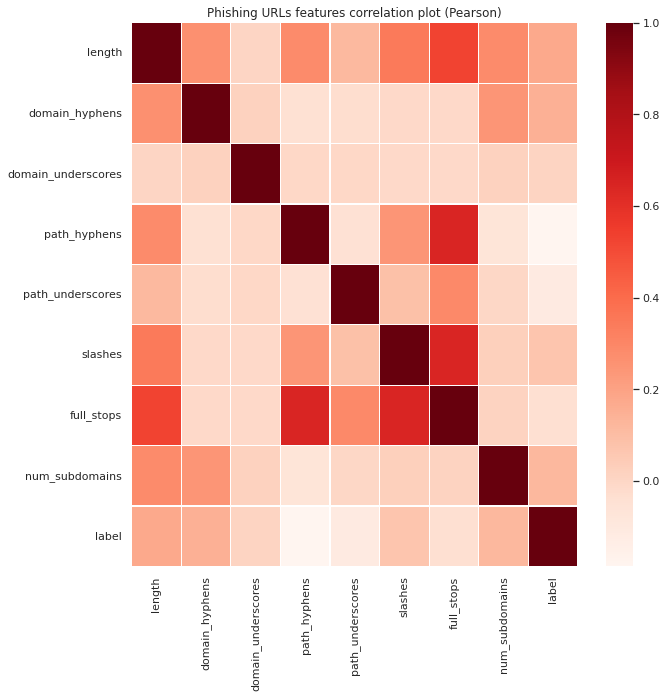

In [39]:
# Checking for correlation between features
plt.figure(figsize = (10,10))
plt.title('Phishing URLs features correlation plot (Pearson)')
corr = clone.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [ ]:
#  Splitting our data

numeric_features = ['length', 'domain_hyphens', 'domain_underscores', 'path_hyphens', 'path_underscores', 'slashes', 'full_stops', 'num_subdomains']
url_data= url_data[numeric_features]
X_train, X_test, y_train, y_test = train_test_split(url_data, url_data_y, test_size=0.33, random_state=42)

## Oversampling

In [ ]:
# Random Oversampling

print('Original dataset shape %s' % Counter(y_train))
ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
print('Randomly oversampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 263235, 1: 104818})
Randomly oversampled dataset shape Counter({0: 263235, 1: 263235})


In [ ]:
# SMOTE Oversampling

print('Original dataset shape %s' % Counter(y_train))
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print('SMOTE oversampled dataset shape %s' % Counter(y_train_smote))

Original dataset shape Counter({0: 263235, 1: 104818})
SMOTE oversampled dataset shape Counter({0: 263235, 1: 263235})


In [ ]:
# Random Undersampling

print('Original dataset shape %s' % Counter(y_train))
rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
print('Randomly undersampled dataset shape %s' % Counter(y_train_rus))

Original dataset shape Counter({0: 263235, 1: 104818})
Randomly undersampled dataset shape Counter({0: 104818, 1: 104818})


## Feature Selection

In [ ]:
# Feature selection on original dataset

print(f'Original dataset {X_train.shape}')
kBest = SelectKBest(f_classif, k=5)
X_train_feat = kBest.fit_transform(X_train, y_train)
cols = kBest.get_support(indices=True)
X_train_feat = pd.DataFrame(X_train_feat)
print(f'Original dataset after feature selection {X_train_feat.shape}')

X_test_feat = X_test.iloc[:,cols]

Original dataset (368053, 8)
Original dataset after feature selection (368053, 5)


In [ ]:
# Feature selection on randomly oversampled dataset

print(f'Randomly oversampled dataset {X_train_ros.shape}')
kBest = SelectKBest(f_classif, k=5)
X_train_ros_feat = kBest.fit_transform(X_train_ros, y_train_ros)
cols = kBest.get_support(indices=True)
X_train_ros_feat = pd.DataFrame(X_train_ros_feat)
print(f'Randomly oversampled dataset after feature selection {X_train_ros_feat.shape}')

X_test_ros_feat = X_test.iloc[:,cols]

Randomly oversampled dataset (526470, 8)
Randomly oversampled dataset after feature selection (526470, 5)


In [ ]:
# Feature selection on SMOTE oversampled dataset

print(f'SMOTE oversampled dataset {X_train_smote.shape}')
kBest = SelectKBest(f_classif, k=5)
X_train_smote_feat = kBest.fit_transform(X_train_smote, y_train_smote)
cols = kBest.get_support(indices=True)
X_train_smote_feat = pd.DataFrame(X_train_smote_feat)
print(f'SMOTE oversampled dataset after feature selection {X_train_smote_feat.shape}')

X_test_smote_feat = X_test.iloc[:,cols]

SMOTE oversampled dataset (526470, 8)
SMOTE oversampled dataset after feature selection (526470, 5)


In [ ]:
# Feature selection on randomly undersampled dataset

print(f'Randomly undersampled dataset {X_train_rus.shape}')
kBest = SelectKBest(f_classif, k=5)
X_train_rus_feat = kBest.fit_transform(X_train_rus, y_train_rus)
cols = kBest.get_support(indices=True)
X_train_rus_feat = pd.DataFrame(X_train_rus_feat)
print(f'Randomly undersampled dataset after feature selection {X_train_rus_feat.shape}')

X_test_rus_feat = X_test.iloc[:,cols]

Randomly undersampled dataset (209636, 8)
Randomly undersampled dataset after feature selection (209636, 5)


We will train our selected models on the listed versions of our dataset:
1.   Original dataset
2.   Original dataset with feature selection
3.   SMOTE Oversampled dataset
4.   SMOTE Oversampled dataset with feature selection
5.   Randomly Oversampled dataset
6.   Randomly Oversampled dataset with feature selection
7.   Randomly Undersampled dataset 
8.   Randomly Undersampled dataset with feature selection

# Originaal Dataset

##Model 1

In [ ]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=None)
DT.fit(X_train,y_train)
pred1=DT.predict(X_test)

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_train, y_train);
pred2 = rf.predict(X_test)

KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train,y_train)
pred3=KNN.predict(X_test)

finalpred = (pred1*4+ np.round(pred2)*4+pred3*3)/11

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(finalpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(finalpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(finalpred)))

Confusion Matrix: 
 [[120147   9529]
 [ 17636  33968]]

Accuracy : 
 85.01489408649603

Report : 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90    129676
           1       0.78      0.66      0.71     51604

    accuracy                           0.85    181280
   macro avg       0.83      0.79      0.81    181280
weighted avg       0.85      0.85      0.85    181280



## Model 2

In [ ]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train,y_train)
DecisionTree_pred = DecisionTree.predict(X_test)

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train,y_train)
KNN_pred = KNN.predict(X_test)

MLPC = MLPClassifier(random_state=1, max_iter=300)
MLPC.fit(X_train,y_train)
MLPC_pred = MLPC.predict(X_test)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train,y_train)
RandomForest_pred = RandomForest.predict(X_test)

modelpred = (DecisionTree_pred + KNN_pred + RandomForest_pred )/4

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(modelpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(modelpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(modelpred)))

Confusion Matrix: 
 [[123431   6245]
 [ 22543  29061]]

Accuracy : 
 84.11959399823478

Report : 
               precision    recall  f1-score   support

           0       0.85      0.95      0.90    129676
           1       0.82      0.56      0.67     51604

    accuracy                           0.84    181280
   macro avg       0.83      0.76      0.78    181280
weighted avg       0.84      0.84      0.83    181280



## Model 3

In [ ]:
model = BaggingRegressor(DecisionTreeRegressor(random_state=1))
model.fit(X_train, y_train)
pred5 = model.predict(X_test)

model = AdaBoostRegressor()
model.fit(X_train, y_train)
pred6 = model.predict(X_test)

model= GradientBoostingRegressor()
model.fit(X_train, y_train)
pred7 = model.predict(X_test)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train,y_train)
pred8 = RandomForest.predict(X_test)

model = lgb.LGBMClassifier()
model.fit(X_train,y_train)
pred9 = model.predict(X_test)

modelpred = (pred5 + pred6 + pred7 + pred8 + pred9)/6

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(modelpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(modelpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(modelpred)))

Confusion Matrix: 
 [[125028   4648]
 [ 24967  26637]]

Accuracy : 
 83.66339364518977

Report : 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89    129676
           1       0.85      0.52      0.64     51604

    accuracy                           0.84    181280
   macro avg       0.84      0.74      0.77    181280
weighted avg       0.84      0.84      0.82    181280



# Original Dataset with feature selection

##Model 1

In [ ]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=None)
DT = DT.fit(X_train_feat, y_train)
pred1 = DT.predict(X_test_feat)

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_train_feat, y_train);
pred2 = rf.predict(X_test_feat)

KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train_feat,y_train)
pred3=KNN.predict(X_test_feat)

finalpred = (pred1*4+ np.round(pred2)*4+pred3*3)/11

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(finalpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(finalpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(finalpred)))

Confusion Matrix: 
 [[125080   4596]
 [ 37073  14531]]

Accuracy : 
 77.01401147396292

Report : 
               precision    recall  f1-score   support

           0       0.77      0.96      0.86    129676
           1       0.76      0.28      0.41     51604

    accuracy                           0.77    181280
   macro avg       0.77      0.62      0.63    181280
weighted avg       0.77      0.77      0.73    181280



## Model 2

In [ ]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train_feat,y_train)
DecisionTree_pred = DecisionTree.predict(X_test_feat)

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_feat, y_train)
KNN_pred = KNN.predict(X_test_feat)

MLPC = MLPClassifier(random_state=1, max_iter=300)
MLPC.fit(X_train_feat, y_train)
MLPC_pred = MLPC.predict(X_test_feat)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_feat, y_train)
RandomForest_pred = RandomForest.predict(X_test_feat)

modelpred = (DecisionTree_pred + KNN_pred + RandomForest_pred )/4

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(modelpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(modelpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(modelpred)))

Confusion Matrix: 
 [[126772   2904]
 [ 39388  12216]]

Accuracy : 
 76.6703442188879

Report : 
               precision    recall  f1-score   support

           0       0.76      0.98      0.86    129676
           1       0.81      0.24      0.37     51604

    accuracy                           0.77    181280
   macro avg       0.79      0.61      0.61    181280
weighted avg       0.78      0.77      0.72    181280



## Model 3

In [ ]:
model = BaggingRegressor(DecisionTreeRegressor(random_state=1))
model.fit(X_train_feat, y_train)
pred5 = model.predict(X_test_feat)

model = AdaBoostRegressor()
model.fit(X_train_feat, y_train)
pred6 = model.predict(X_test_feat)

model= GradientBoostingRegressor()
model.fit(X_train_feat, y_train)
pred7 = model.predict(X_test_feat)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_feat, y_train)
pred8 = RandomForest.predict(X_test_feat)

model = lgb.LGBMClassifier()
model.fit(X_train_feat, y_train)
pred9 = model.predict(X_test_feat)

modelpred = (pred5 + pred6 + pred7 + pred8 + pred9 )/6

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(modelpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(modelpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(modelpred)))

Confusion Matrix: 
 [[126714   2962]
 [ 38857  12747]]

Accuracy : 
 76.931266548985

Report : 
               precision    recall  f1-score   support

           0       0.77      0.98      0.86    129676
           1       0.81      0.25      0.38     51604

    accuracy                           0.77    181280
   macro avg       0.79      0.61      0.62    181280
weighted avg       0.78      0.77      0.72    181280



# SMOTE Oversampling Dataset

##Model 1

In [ ]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=None)
DT = DT.fit(X_train_smote, y_train_smote)
pred1 = DT.predict(X_test)

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_train_smote, y_train_smote);
pred2 = rf.predict(X_test)

KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train_smote, y_train_smote)
pred3=KNN.predict(X_test)

finalpred = (pred1*4+ np.round(pred2)*4+pred3*3)/11

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(finalpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(finalpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(finalpred)))

Confusion Matrix: 
 [[107934  21742]
 [ 10185  41419]]

Accuracy : 
 82.38801853486319

Report : 
               precision    recall  f1-score   support

           0       0.91      0.83      0.87    129676
           1       0.66      0.80      0.72     51604

    accuracy                           0.82    181280
   macro avg       0.78      0.82      0.80    181280
weighted avg       0.84      0.82      0.83    181280



## Model 2

In [ ]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train_smote, y_train_smote)
DecisionTree_pred = DecisionTree.predict(X_test)

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_smote, y_train_smote)
KNN_pred = KNN.predict(X_test)

MLPC = MLPClassifier(random_state=1, max_iter=300)
MLPC.fit(X_train_smote, y_train_smote)
MLPC_pred = MLPC.predict(X_test)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_smote, y_train_smote)
RandomForest_pred = RandomForest.predict(X_test)

modelpred = (DecisionTree_pred + KNN_pred + RandomForest_pred )/4

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(modelpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(modelpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(modelpred)))

Confusion Matrix: 
 [[118776  10900]
 [ 18422  33182]]

Accuracy : 
 83.82502206531332

Report : 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89    129676
           1       0.75      0.64      0.69     51604

    accuracy                           0.84    181280
   macro avg       0.81      0.78      0.79    181280
weighted avg       0.83      0.84      0.83    181280



## Model 3

In [ ]:
model = BaggingRegressor(DecisionTreeRegressor(random_state=1))
model.fit(X_train_smote, y_train_smote)
pred5 = model.predict(X_test)

model = AdaBoostRegressor()
model.fit(X_train_smote, y_train_smote)
pred6 = model.predict(X_test)

model= GradientBoostingRegressor()
model.fit(X_train_smote, y_train_smote)
pred7 = model.predict(X_test)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_smote, y_train_smote)
pred8 = RandomForest.predict(X_test)

model = lgb.LGBMClassifier()
model.fit(X_train_smote, y_train_smote)
pred9 = model.predict(X_test)

modelpred = (pred5 + pred6 + pred7 + pred8 + pred9 )/6

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(modelpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(modelpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(modelpred)))

Confusion Matrix: 
 [[113331  16345]
 [ 13629  37975]]

Accuracy : 
 83.4653574580759

Report : 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88    129676
           1       0.70      0.74      0.72     51604

    accuracy                           0.83    181280
   macro avg       0.80      0.80      0.80    181280
weighted avg       0.84      0.83      0.84    181280



# SMOTE oversampling with feature selection

##Model 1

In [ ]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=None)
DT = DT.fit(X_train_smote_feat, y_train_smote)
pred1 = DT.predict(X_test_smote_feat)
 
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_train_smote_feat, y_train_smote);
pred2 = rf.predict(X_test_smote_feat)

KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train_smote_feat, y_train_smote)
pred3=KNN.predict(X_test_smote_feat)

finalpred = (pred1*4+ np.round(pred2)*4+pred3*3)/11

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(finalpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(finalpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(finalpred)))

Confusion Matrix: 
 [[82310 47366]
 [11344 40260]]

Accuracy : 
 67.61363636363636

Report : 
               precision    recall  f1-score   support

           0       0.88      0.63      0.74    129676
           1       0.46      0.78      0.58     51604

    accuracy                           0.68    181280
   macro avg       0.67      0.71      0.66    181280
weighted avg       0.76      0.68      0.69    181280



## Model 2

In [ ]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train_smote_feat, y_train_smote)
DecisionTree_pred = DecisionTree.predict(X_test_smote_feat)

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_smote_feat, y_train_smote)
KNN_pred = KNN.predict(X_test_smote_feat)

MLPC = MLPClassifier(random_state=1, max_iter=300)
MLPC.fit(X_train_smote_feat, y_train_smote)
MLPC_pred = MLPC.predict(X_test_smote_feat)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_smote_feat, y_train_smote)
RandomForest_pred = RandomForest.predict(X_test_smote_feat)

modelpred = (DecisionTree_pred + KNN_pred + RandomForest_pred )/4

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(modelpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(modelpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(modelpred)))

Confusion Matrix: 
 [[115322  14354]
 [ 31784  19820]]

Accuracy : 
 74.54876434245367

Report : 
               precision    recall  f1-score   support

           0       0.78      0.89      0.83    129676
           1       0.58      0.38      0.46     51604

    accuracy                           0.75    181280
   macro avg       0.68      0.64      0.65    181280
weighted avg       0.73      0.75      0.73    181280



## Model 3

In [ ]:
model = BaggingRegressor(DecisionTreeRegressor(random_state=1))
model.fit(X_train_smote_feat, y_train_smote)
pred5 = model.predict(X_test_smote_feat)

model = AdaBoostRegressor()
model.fit(X_train_smote_feat, y_train_smote)
pred6 = model.predict(X_test_smote_feat)

model= GradientBoostingRegressor()
model.fit(X_train_smote_feat, y_train_smote)
pred7 = model.predict(X_test_smote_feat)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_smote_feat, y_train_smote)
pred8 = RandomForest.predict(X_test_smote_feat)

model = lgb.LGBMClassifier()
model.fit(X_train_smote_feat, y_train_smote)
pred9 = model.predict(X_test_smote_feat)

modelpred = (pred5 + pred6 + pred7 + pred8 + pred9 )/6

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(modelpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(modelpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(modelpred)))

Confusion Matrix: 
 [[84228 45448]
 [12267 39337]]

Accuracy : 
 68.16251103265665

Report : 
               precision    recall  f1-score   support

           0       0.87      0.65      0.74    129676
           1       0.46      0.76      0.58     51604

    accuracy                           0.68    181280
   macro avg       0.67      0.71      0.66    181280
weighted avg       0.76      0.68      0.70    181280



# Random Oversampling

##Model 1

In [ ]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=None)
DT = DT.fit(X_train_ros, y_train_ros)
pred1 = DT.predict(X_test)

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_train_ros, y_train_ros);
pred2 = rf.predict(X_test)

KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train_ros, y_train_ros)
pred3=KNN.predict(X_test)

finalpred = (pred1*4+ np.round(pred2)*4+pred3*3)/11

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(finalpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(finalpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(finalpred)))

Confusion Matrix: 
 [[108539  21137]
 [ 10446  41158]]

Accuracy : 
 82.57778022947926

Report : 
               precision    recall  f1-score   support

           0       0.91      0.84      0.87    129676
           1       0.66      0.80      0.72     51604

    accuracy                           0.83    181280
   macro avg       0.79      0.82      0.80    181280
weighted avg       0.84      0.83      0.83    181280



## Model 2

In [ ]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train_ros, y_train_ros)
DecisionTree_pred = DecisionTree.predict(X_test)

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_ros, y_train_ros)
KNN_pred = KNN.predict(X_test)

MLPC = MLPClassifier(random_state=1, max_iter=300)
MLPC.fit(X_train_ros, y_train_ros)
MLPC_pred = MLPC.predict(X_test)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_ros, y_train_ros)
RandomForest_pred = RandomForest.predict(X_test)

modelpred = (DecisionTree_pred + KNN_pred + RandomForest_pred )/4

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(modelpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(modelpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(modelpred)))

Confusion Matrix: 
 [[118971  10705]
 [ 18363  33241]]

Accuracy : 
 83.96513680494263

Report : 
               precision    recall  f1-score   support

           0       0.87      0.92      0.89    129676
           1       0.76      0.64      0.70     51604

    accuracy                           0.84    181280
   macro avg       0.81      0.78      0.79    181280
weighted avg       0.84      0.84      0.84    181280



## Model 3

In [ ]:
model = BaggingRegressor(DecisionTreeRegressor(random_state=1))
model.fit(X_train_ros, y_train_ros)
pred5 = model.predict(X_test)

model = AdaBoostRegressor()
model.fit(X_train_ros, y_train_ros)
pred6 = model.predict(X_test)

model= GradientBoostingRegressor()
model.fit(X_train_ros, y_train_ros)
pred7 = model.predict(X_test)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_ros, y_train_ros)
pred8 = RandomForest.predict(X_test)

model = lgb.LGBMClassifier()
model.fit(X_train_ros, y_train_ros)
pred9 = model.predict(X_test)

modelpred = (pred5 + pred6 + pred7 + pred8 + pred9 )/6

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(modelpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(modelpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(modelpred)))

Confusion Matrix: 
 [[113333  16343]
 [ 13620  37984]]

Accuracy : 
 83.47142541924096

Report : 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88    129676
           1       0.70      0.74      0.72     51604

    accuracy                           0.83    181280
   macro avg       0.80      0.81      0.80    181280
weighted avg       0.84      0.83      0.84    181280



# Random Oversampling with Feature Selection

##Model 1

In [ ]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=None)
DT = DT.fit(X_train_ros_feat, y_train_ros)
pred1 = DT.predict(X_test_ros_feat)

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_train_ros_feat, y_train_ros);
pred2 = rf.predict(X_test_ros_feat)

KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train_ros_feat, y_train_ros)
pred3=KNN.predict(X_test_ros_feat)

finalpred = (pred1*4+ np.round(pred2)*4+pred3*3)/11

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(finalpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(finalpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(finalpred)))

Confusion Matrix: 
 [[81570 48106]
 [10991 40613]]

Accuracy : 
 67.4001544571933

Report : 
               precision    recall  f1-score   support

           0       0.88      0.63      0.73    129676
           1       0.46      0.79      0.58     51604

    accuracy                           0.67    181280
   macro avg       0.67      0.71      0.66    181280
weighted avg       0.76      0.67      0.69    181280



## Model 2

In [ ]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train_ros_feat, y_train_ros)
DecisionTree_pred = DecisionTree.predict(X_test_ros_feat)

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_ros_feat, y_train_ros)
KNN_pred = KNN.predict(X_test_ros_feat)

MLPC = MLPClassifier(random_state=1, max_iter=300)
MLPC.fit(X_train_ros_feat, y_train_ros)
MLPC_pred = MLPC.predict(X_test_ros_feat)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_ros_feat, y_train_ros)
RandomForest_pred = RandomForest.predict(X_test_ros_feat)

modelpred = (DecisionTree_pred + KNN_pred + RandomForest_pred )/4

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(modelpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(modelpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(modelpred)))

Confusion Matrix: 
 [[116431  13245]
 [ 32719  18885]]

Accuracy : 
 74.64474845542807

Report : 
               precision    recall  f1-score   support

           0       0.78      0.90      0.84    129676
           1       0.59      0.37      0.45     51604

    accuracy                           0.75    181280
   macro avg       0.68      0.63      0.64    181280
weighted avg       0.73      0.75      0.73    181280



## Model 3

In [ ]:
model = BaggingRegressor(DecisionTreeRegressor(random_state=1))
model.fit(X_train_ros_feat, y_train_ros)
pred5 = model.predict(X_test_ros_feat)

model = AdaBoostRegressor()
model.fit(X_train_ros_feat, y_train_ros)
pred6 = model.predict(X_test_ros_feat)

model= GradientBoostingRegressor()
model.fit(X_train_ros_feat, y_train_ros)
pred7 = model.predict(X_test_ros_feat)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_ros_feat, y_train_ros)
pred8 = RandomForest.predict(X_test_ros_feat)

model = lgb.LGBMClassifier()
model.fit(X_train_ros_feat, y_train_ros)
pred9 = model.predict(X_test_ros_feat)

modelpred = (pred5 + pred6 + pred7 + pred8 + pred9 )/6

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(modelpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(modelpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(modelpred)))

Confusion Matrix: 
 [[83088 46588]
 [11629 39975]]

Accuracy : 
 67.88559135039718

Report : 
               precision    recall  f1-score   support

           0       0.88      0.64      0.74    129676
           1       0.46      0.77      0.58     51604

    accuracy                           0.68    181280
   macro avg       0.67      0.71      0.66    181280
weighted avg       0.76      0.68      0.69    181280



# Random Undersampling

##Model 1

In [ ]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=None)
DT = DT.fit(X_train_rus, y_train_rus)
pred1 = DT.predict(X_test)

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_train_rus, y_train_rus);
pred2 = rf.predict(X_test)

KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train_rus, y_train_rus)
pred3=KNN.predict(X_test)

finalpred = (pred1*4+ np.round(pred2)*4+pred3*3)/11
print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(finalpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(finalpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(finalpred)))

Confusion Matrix: 
 [[81570 48106]
 [10991 40613]]

Accuracy : 
 67.4001544571933

Report : 
               precision    recall  f1-score   support

           0       0.88      0.63      0.73    129676
           1       0.46      0.79      0.58     51604

    accuracy                           0.67    181280
   macro avg       0.67      0.71      0.66    181280
weighted avg       0.76      0.67      0.69    181280



## Model 2

In [ ]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train_rus, y_train_rus)
DecisionTree_pred = DecisionTree.predict(X_test)

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_rus, y_train_rus)
KNN_pred = KNN.predict(X_test)

MLPC = MLPClassifier(random_state=1, max_iter=300)
MLPC.fit(X_train_rus, y_train_rus)
MLPC_pred = MLPC.predict(X_test)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_rus, y_train_rus)
RandomForest_pred = RandomForest.predict(X_test)

finalPred = (DecisionTree_pred + KNN_pred + RandomForest_pred )/4

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(finalPred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(finalPred))*100)
print("\nReport : \n", classification_report(y_test, np.round(finalPred)))

Confusion Matrix: 
 [[123499   6177]
 [ 27559  24045]]

Accuracy : 
 81.39011473962931

Report : 
               precision    recall  f1-score   support

           0       0.82      0.95      0.88    129676
           1       0.80      0.47      0.59     51604

    accuracy                           0.81    181280
   macro avg       0.81      0.71      0.73    181280
weighted avg       0.81      0.81      0.80    181280



## Model 3

In [ ]:
model= GradientBoostingRegressor()
model.fit(X_train_rus, y_train_rus)
pred7 = model.predict(X_test)

model = BaggingRegressor(DecisionTreeRegressor(random_state=1))
model.fit(X_train_rus, y_train_rus)
pred5 = model.predict(X_test)

model = AdaBoostRegressor()
model.fit(X_train_rus, y_train_rus)
pred6 = model.predict(X_test)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_rus, y_train_rus)
pred8 = RandomForest.predict(X_test)

model = lgb.LGBMClassifier()
model.fit(X_train_rus, y_train_rus)
pred9 = model.predict(X_test)

final = (pred5 + pred6 + pred7 + pred8 + pred9 )/6
print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(final)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(final))*100)
print("\nReport : \n", classification_report(y_test, np.round(final)))

Confusion Matrix: 
 [[112728  16948]
 [ 13310  38294]]

Accuracy : 
 83.30869373345101

Report : 
               precision    recall  f1-score   support

           0       0.89      0.87      0.88    129676
           1       0.69      0.74      0.72     51604

    accuracy                           0.83    181280
   macro avg       0.79      0.81      0.80    181280
weighted avg       0.84      0.83      0.83    181280



# Random Undersampling with feature selection

##Model 1

In [ ]:
DT = DecisionTreeClassifier(criterion='gini', max_depth=None)
DT = DT.fit(X_train_rus_feat, y_train_rus)
pred1 = DT.predict(X_test_rus_feat)

rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_train_rus_feat, y_train_rus);
pred2 = rf.predict(X_test_rus_feat)

KNN = KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train_rus_feat, y_train_rus)
pred3=KNN.predict(X_test_rus_feat)

finalpred = (pred1*4+ np.round(pred2)*4+pred3*3)/11

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(finalpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(finalpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(finalpred)))

Confusion Matrix: 
 [[83001 46675]
 [11627 39977]]

Accuracy : 
 67.83870255957635

Report : 
               precision    recall  f1-score   support

           0       0.88      0.64      0.74    129676
           1       0.46      0.77      0.58     51604

    accuracy                           0.68    181280
   macro avg       0.67      0.71      0.66    181280
weighted avg       0.76      0.68      0.69    181280



## Model 2

In [ ]:
DecisionTree = DecisionTreeClassifier()
DecisionTree.fit(X_train_rus_feat, y_train_rus)
DecisionTree_pred = DecisionTree.predict(X_test_rus_feat)

KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train_rus_feat, y_train_rus)
KNN_pred = KNN.predict(X_test_rus_feat)

MLPC = MLPClassifier(random_state=1, max_iter=300)
MLPC.fit(X_train_rus_feat, y_train_rus)
MLPC_pred = MLPC.predict(X_test_rus_feat)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_rus_feat, y_train_rus)
RandomForest_pred = RandomForest.predict(X_test_rus_feat)

modelpred = (DecisionTree_pred + KNN_pred + RandomForest_pred )/4

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(modelpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(modelpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(modelpred)))

Confusion Matrix: 
 [[128049   1627]
 [ 42869   8735]]

Accuracy : 
 75.45454545454545

Report : 
               precision    recall  f1-score   support

           0       0.75      0.99      0.85    129676
           1       0.84      0.17      0.28     51604

    accuracy                           0.75    181280
   macro avg       0.80      0.58      0.57    181280
weighted avg       0.78      0.75      0.69    181280



## Model 3

In [ ]:
model = BaggingRegressor(DecisionTreeRegressor(random_state=1))
model.fit(X_train_rus_feat, y_train_rus)
pred5 = model.predict(X_test_rus_feat)

model = AdaBoostRegressor()
model.fit(X_train_rus_feat, y_train_rus)
pred6 = model.predict(X_test_rus_feat)

model= GradientBoostingRegressor()
model.fit(X_train_rus_feat, y_train_rus)
pred7 = model.predict(X_test_rus_feat)

RandomForest = RandomForestClassifier()
RandomForest.fit(X_train_rus_feat, y_train_rus)
pred8 = RandomForest.predict(X_test_rus_feat)

model = lgb.LGBMClassifier()
model.fit(X_train_rus_feat, y_train_rus)
pred9 = model.predict(X_test_rus_feat)

modelpred = (pred5 + pred6 + pred7 + pred8 + pred9 )/6

print("Confusion Matrix: \n", confusion_matrix(y_test, np.round(modelpred)))
print("\nAccuracy : \n", accuracy_score(y_test, np.round(modelpred))*100)
print("\nReport : \n", classification_report(y_test, np.round(modelpred)))

Confusion Matrix: 
 [[84000 45676]
 [12002 39602]]

Accuracy : 
 68.18292144748456

Report : 
               precision    recall  f1-score   support

           0       0.87      0.65      0.74    129676
           1       0.46      0.77      0.58     51604

    accuracy                           0.68    181280
   macro avg       0.67      0.71      0.66    181280
weighted avg       0.76      0.68      0.70    181280

